## remove an object from an image

The idea of this recipe is from the [skimage example](http://scikit-image.org/docs/dev/auto_examples/plot_seam_carving.html#example-plot-seam-carving-py) about using ***Seam Carving*** for 
 - (a) less-distorted image resizing
 - (b) object removing
 - (c) special effect of images (e.g. cartoon faces)

The transformation that [Seam Carving](https://en.wikipedia.org/wiki/Seam_carving) performs is also referred to as retargedt-resizing. The basic idea is 
 - highlight the importance of different regions in the image (e.g., by edge, manual label, labelling and etc)
 - Seam Carving will try to reduce/extend the space between important regions by adjusting less important regions

In [2]:
%matplotlib inline

In [3]:
import matplotlib.pyplot as plt
from skimage import io, color, feature, transform, util, filters, measure, morphology
import numpy as np
import scipy.ndimage as nd

### A. retargeted-resizing

Assign high importances to interesting regions in images, e.g., by gradient, edges and etc

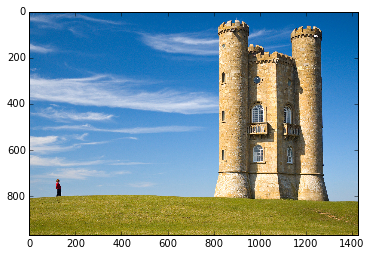

In [3]:
## raw image
castle = io.imread("https://upload.wikimedia.org/wikipedia/commons/c/cb/Broadway_tower_edit.jpg")
plt.imshow(castle)

(968, 1228, 3) (968, 1228, 3) (968, 1228, 3)


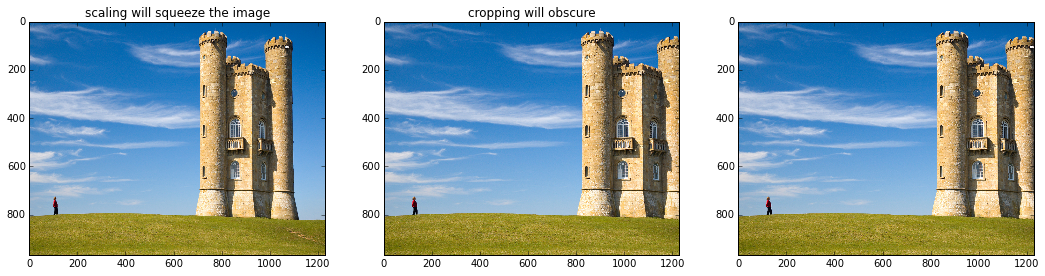

In [23]:
## different ways of resizing

fig, axes = plt.subplots(1, 3, figsize = (18, 6))

castle_shape = castle.shape[:-1]

## scaling will have the undesirable squeezing effect
scaled_castle = transform.resize(castle, (castle_shape[0], castle_shape[1]-200))
axes[0].imshow(scaled_castle)
axes[0].set_title("scaling will squeeze the image")

## croping will obscure
cropped_castle = castle[:, :-200, :]
axes[1].imshow(cropped_castle)
axes[1].set_title("cropping will obscure")

## seam carving - background will have less edges and thus less importance
## use vertical seams to remove space horizontally
wts = filters.sobel(color.rgb2gray(castle))
carved_castle = transform.seam_carve(castle, wts, mode = "vertical", num = 200)
axes[2].imshow(carved_castle)

print scaled_castle.shape, cropped_castle.shape, carved_castle.shape

### B. object removal

Removal of the castle by marking it as unimportant

538


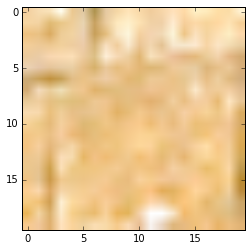

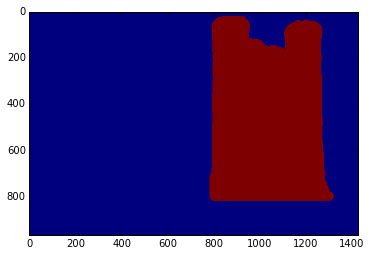

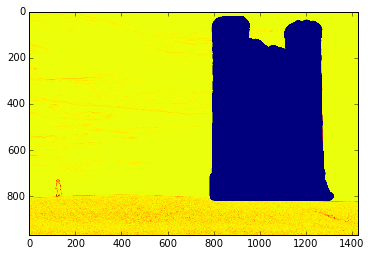

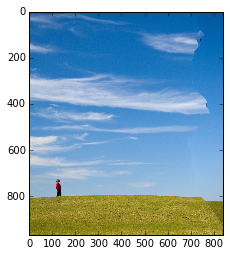

In [117]:
## find the castle 

## use a template of catle surface
template = castle[100:120, 850:870]
plt.imshow(template)

r = feature.match_template(castle, template, )
roi_rows, roi_cols = np.where(r[:,:,0] > filters.threshold_otsu(r[:,:,0]))
roi_rows = np.clip(roi_rows, a_min = 40, a_max = 800)
roi_cols = np.clip(roi_cols, a_min = 800, a_max = 1300)
plt.figure()
roi = np.zeros((castle.shape[0], castle.shape[1]))
roi[roi_rows, roi_cols] = 1
roi = nd.binary_fill_holes(roi)
roi = morphology.binary_dilation(roi, selem = morphology.disk(19.)) ## make the boundary dialated
plt.imshow(roi)


removal_wts = wts.copy()
removal_wts[roi.astype(np.bool)] = -1. # very unimportant
plt.figure()
plt.imshow(removal_wts)

_, cs = np.where(roi > 0)
ncols = cs.max() - cs.min()
print ncols
removed_castle = transform.seam_carve(castle, removal_wts, mode = "vertical", num = ncols+ 50)
plt.figure()
plt.imshow(removed_castle)

### C. Special Effects

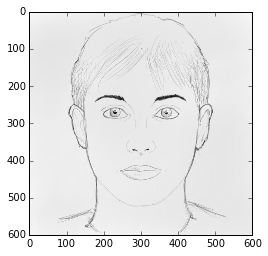

In [18]:
face = io.imread("http://www.drawing-factory.com/wp-content/uploads/2014/12/how-to-draw-faces-09.jpg")
plt.imshow(face)

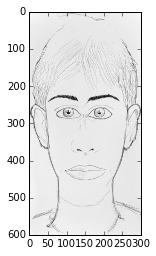

In [21]:
def special_effect(img, mode, num):
    wts = filters.sobel(color.rgb2gray(img))
    special = transform.seam_carve(img, wts, mode = mode, num = num )
    return special

special = special_effect(face,mode = "vertical", num = 300, )
plt.imshow(special)